## Material Partitioning Benchmark Result Visualization

In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

from ase import Atoms
from ase.visualize import view
from ase.build import make_supercell
from ase.io import read

from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt

Load material ids

In [18]:
from ase.io import write

n = 50000

FULL_DF_FILE = f'results/n_{n}_full_orb.csv'
PARTITION_DF_FILE = f'results/n_{n}_partitions_orb.csv'

all_df = pd.read_csv(FULL_DF_FILE)
partition_df = pd.read_csv(PARTITION_DF_FILE)

In [19]:
all_df

,method,node_count,root_node_count,extended_ratio,cut_edges,cut_weight_sum,inverse_cut_weight_sum,core_max,core_min,core_mean,core_std,core_range,ext_max,ext_min,ext_mean,ext_std,ext_range
0,metis,133459,60750,0.544804,31468,54663406,18.518222,7783,7372,7593.75,152.017885,189.25,17356,16138,16682.375,447.426792,673.625
1,grid,280766,60750,0.783628,94696,167316645,56.180793,7620,7578,7593.75,15.400893,26.25,35338,34791,35095.750,223.693848,242.250
2,metis_unweighted,131920,60750,0.539494,30498,53094588,17.907004,7821,7372,7593.75,192.400461,227.25,17160,16101,16490.000,324.065580,670.000
3,metis,209552,60480,0.711384,57485,164471313,21.378089,7787,7398,7560.00,147.293924,227.00,26790,25691,26194.000,384.421644,596.000
4,grid,231096,60480,0.738291,69316,203355001,24.972483,7608,7504,7560.00,39.041644,48.00,28916,28846,28887.000,22.594247,29.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,grid,255662,58368,0.771699,86382,209144773,37.633447,7300,7290,7296.00,3.708099,4.00,31967,31946,31957.750,6.533567,9.250
296,metis_unweighted,132524,58368,0.559567,44310,105498229,19.765096,7449,7157,7296.00,90.041657,153.00,16767,16397,16565.500,119.547062,201.500
297,metis,171895,62208,0.638105,45212,77395524,27.413926,8009,7549,7776.00,163.065938,233.00,22319,20605,21486.875,544.390356,832.125
298,grid,226195,62208,0.724981,71690,121527516,44.092770,7956,7596,7776.00,108.000000,180.00,28608,27909,28274.375,240.520237,333.625


In [20]:
partition_df

,method,core_n,n
0,metis,7695,16144
1,metis,7372,16936
2,metis,7764,16138
3,metis,7501,16650
4,metis,7783,16953
...,...,...,...
2395,metis_unweighted,7683,21161
2396,metis_unweighted,8001,21426
2397,metis_unweighted,7642,21566
2398,metis_unweighted,8002,21574


In [21]:
summary = all_df.groupby("method")[[
    "core_max", "core_min", "core_mean",
    "core_std", "core_range"
]].mean().round(3)

print(summary.to_string(line_width=1000))
print('\n\n')

summary = all_df.groupby("method")[[
    "ext_max", "ext_min", "ext_mean",
    "ext_std", "ext_range"
]].mean().round(3)

print(summary.to_string(line_width=1000))

                  core_max  core_min  core_mean  core_std  core_range
method                                                               
grid               7293.67   6938.09   7106.811   118.111     186.859
metis              7313.00   6923.21   7106.811   142.374     206.189
metis_unweighted   7258.14   6956.13   7106.811   108.936     151.329



                   ext_max   ext_min   ext_mean  ext_std  ext_range
method                                                             
grid              27925.38  26916.87  27384.449  335.169    540.931
metis             21640.97  20400.11  21007.850  415.972    633.120
metis_unweighted  21280.67  20254.58  20744.761  337.010    535.909


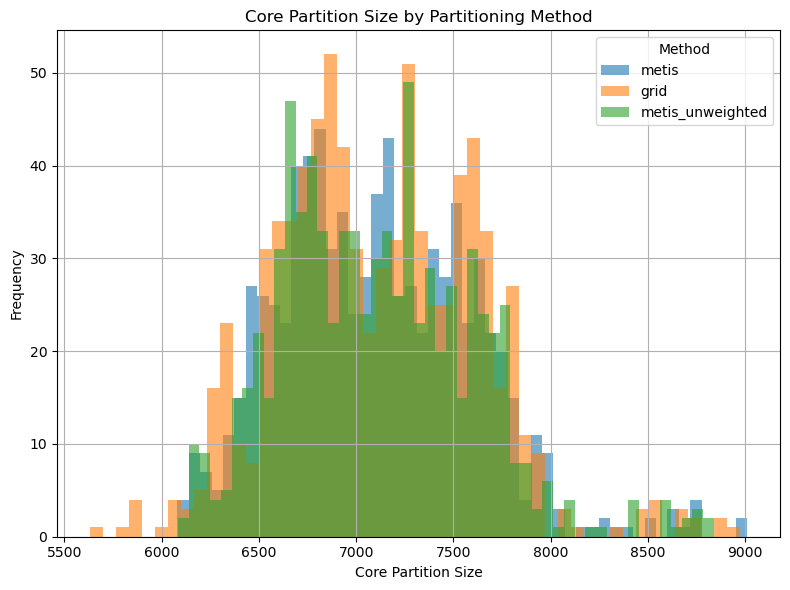

In [22]:
methods = partition_df['method'].unique()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple']  # Add more if needed
bins = 50

plt.figure(figsize=(8, 6))

for method, color in zip(methods, colors):
    subset = partition_df[partition_df['method'] == method]['core_n']
    plt.hist(subset, bins=bins, alpha=0.6, label=method, color=color)

plt.title("Core Partition Size by Partitioning Method")
plt.xlabel("Core Partition Size")
plt.ylabel("Frequency")
plt.legend(title="Method")
plt.grid(True)
plt.tight_layout()
plt.show()

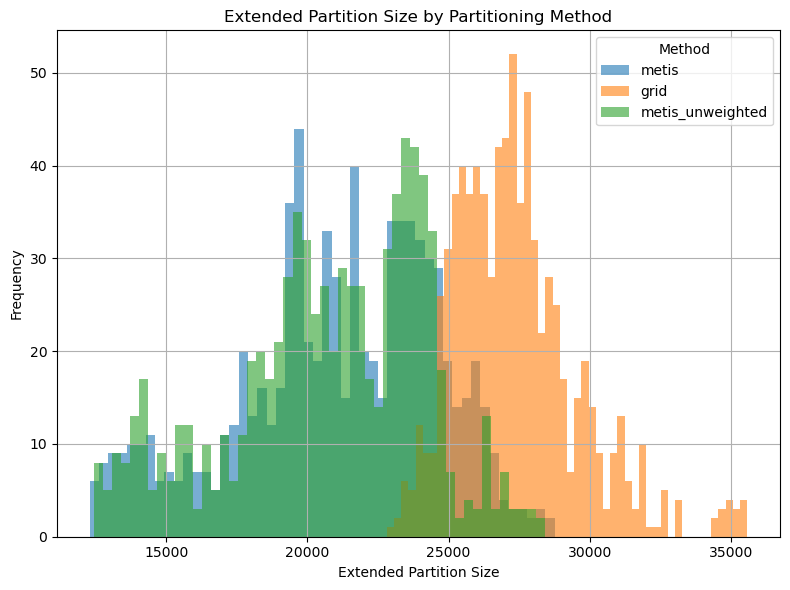

In [23]:
methods = partition_df['method'].unique()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple']  # Add more if needed
bins = 50

plt.figure(figsize=(8, 6))

for method, color in zip(methods, colors):
    subset = partition_df[partition_df['method'] == method]['n']
    plt.hist(subset, bins=bins, alpha=0.6, label=method, color=color)

plt.title("Extended Partition Size by Partitioning Method")
plt.xlabel("Extended Partition Size")
plt.ylabel("Frequency")
plt.legend(title="Method")
plt.grid(True)
plt.tight_layout()
plt.show()

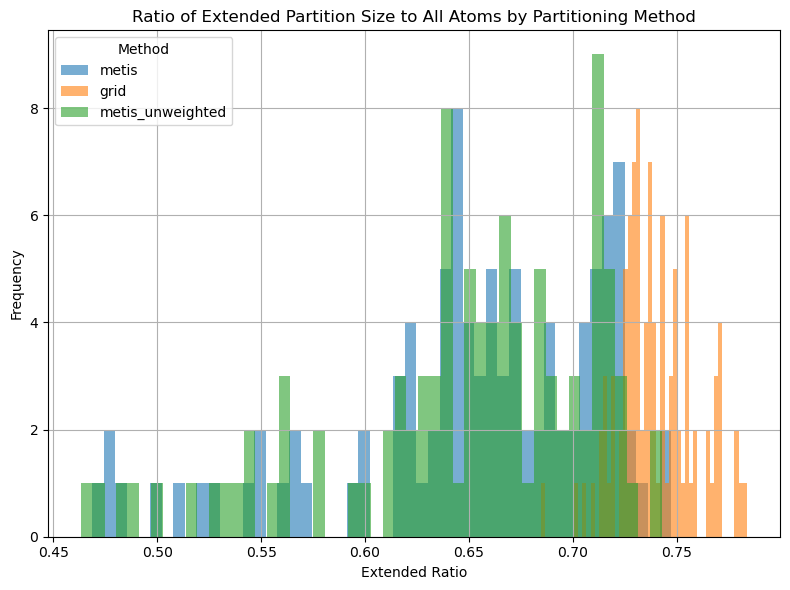

In [24]:
methods = all_df['method'].unique()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple']  # Add more if needed
bins = 50

plt.figure(figsize=(8, 6))

for method, color in zip(methods, colors):
    subset = all_df[all_df['method'] == method]['extended_ratio']
    plt.hist(subset, bins=bins, alpha=0.6, label=method, color=color)

plt.title("Ratio of Extended Partition Size to All Atoms by Partitioning Method")
plt.xlabel("Extended Ratio")
plt.ylabel("Frequency")
plt.legend(title="Method")
plt.grid(True)
plt.tight_layout()
plt.show()

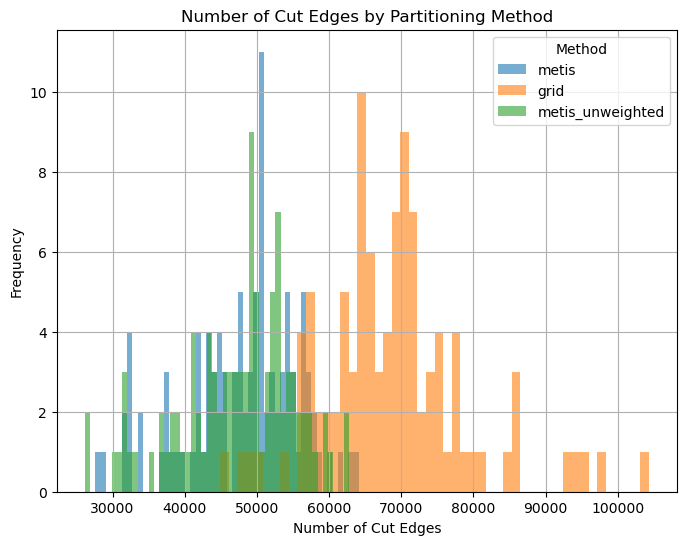

In [25]:
methods = all_df['method'].unique()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple']  # Add more if needed
bins = 50

plt.figure(figsize=(8, 6))

for method, color in zip(methods, colors):
    subset = all_df[all_df['method'] == method]['cut_edges']
    plt.hist(subset, bins=bins, alpha=0.6, label=method, color=color)

plt.title("Number of Cut Edges by Partitioning Method")
plt.xlabel("Number of Cut Edges")
plt.ylabel("Frequency")
plt.legend(title="Method")
plt.grid(True)
plt.show()